In [1]:
import numpy as np
import tensorflow as tf
from cnn_model import CNNKeras
from tensorflow import keras
import pickle
import matplotlib.pyplot as plt
from cnn_utils import make_gradcam_heatmap, txt2vec, _plot_score, _get_text_xticks

In [2]:
clf = keras.models.load_model('../Model/textcnn_model.h5')
with open('../Model/textcnn_model_config.pkl', "rb+") as f:
	train_config = pickle.load(f)
label_list = {v:k for k,v in train_config.label_dict.items()}

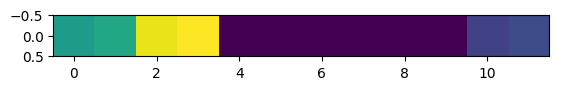

In [3]:
test_txt = 'Calbee/卡乐比进口原味水果麦片即食燕麦片早餐饱腹食品700g冲饮'
test_vec = txt2vec(test_txt,train_config.seq_length,train_config.vocab)
result = clf.predict(test_vec)
predict_label, prediction_prob = result.argmax(), result.max()
heatmap = make_gradcam_heatmap(test_vec, clf, 'conv3')
plt.imshow([heatmap])
plt.show()

/Users/nanzou/anaconda3/envs/learn_notes/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/nanzou/anaconda3/envs/learn_notes/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/nanzou/anaconda3/envs/learn_notes/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimSun'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


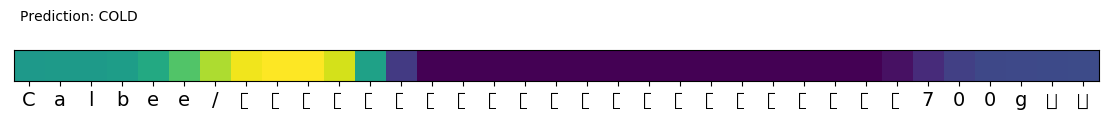

In [4]:
resize_heatmap = tf.keras.preprocessing.image.array_to_img(heatmap[...,np.newaxis,np.newaxis])
resize_heatmap = resize_heatmap.resize((1,35))
resize_heatmap = tf.keras.preprocessing.image.img_to_array(resize_heatmap)
# plt.matshow(resize_heatmap[:,0])
# plt.show()
_plot_score(resize_heatmap[:,0,0], pred_label=label_list[predict_label], txt_len=len(test_txt), xticks=_get_text_xticks(test_txt))

/Users/nanzou/anaconda3/envs/learn_notes/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


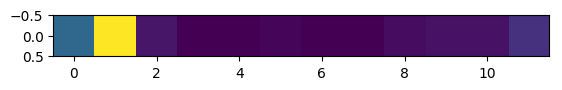

In [5]:
test_txt = '良品铺子-每日麦片早餐冲饮即食麦片代餐坚果酸奶营养燕麦400g'
test_vec = txt2vec(test_txt,train_config.seq_length,train_config.vocab)
result = clf.predict(test_vec)
predict_label, prediction_prob = result.argmax(), result.max()
heatmap = make_gradcam_heatmap(test_vec, clf, 'conv3')
plt.imshow([heatmap])
plt.show()

/Users/nanzou/anaconda3/envs/learn_notes/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


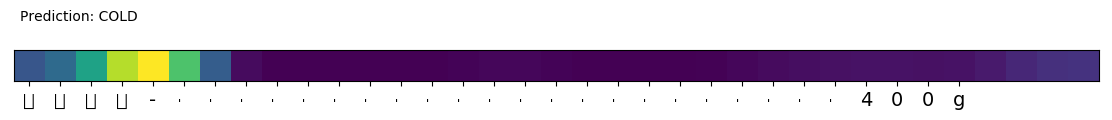

In [6]:
resize_heatmap = tf.keras.preprocessing.image.array_to_img(heatmap[...,np.newaxis,np.newaxis])
resize_heatmap = resize_heatmap.resize((1,35))
resize_heatmap = tf.keras.preprocessing.image.img_to_array(resize_heatmap)
# plt.matshow(resize_heatmap[:,0])
# plt.show()
_plot_score(resize_heatmap[:,0,0], pred_label=label_list[predict_label], txt_len=len(test_txt), xticks=_get_text_xticks(test_txt))

In [7]:
clf.summary()

Model: "keras_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_input (InputLayer)     [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 128)           1280000   
_________________________________________________________________
conv1_1 (Conv1D)             (None, 50, 512)           197120    
_________________________________________________________________
conv1_2 (Conv1D)             (None, 50, 512)           262656    
_________________________________________________________________
mp1 (MaxPooling1D)           (None, 25, 512)           0         
_________________________________________________________________
bn1 (BatchNormalization)     (None, 25, 512)           2048      
_________________________________________________________________
conv2_1 (Conv1D)             (None, 25, 512)           

In [8]:
clf.get_config()

{'name': 'keras_model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 50),
    'dtype': 'float32',
    'sparse': False,
    'name': 'model_input'},
   'name': 'model_input',
   'inbound_nodes': []},
  {'class_name': 'Embedding',
   'config': {'name': 'embedding',
    'trainable': True,
    'batch_input_shape': (None, 50),
    'dtype': 'float32',
    'input_dim': 10000,
    'output_dim': 128,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}},
    'embeddings_regularizer': None,
    'activity_regularizer': None,
    'embeddings_constraint': None,
    'mask_zero': False,
    'input_length': 50},
   'name': 'embedding',
   'inbound_nodes': [[['model_input', 0, 0, {}]]]},
  {'class_name': 'Conv1D',
   'config': {'name': 'conv1_1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 512,
    'kernel_size': (3,),
    'strides': (1,),
    'padding': 'same',
    'data_forma